# Flere viktige konsept

I tillegg til grunnleggende programmering er det en del andre teknikker/konsept som ofte brukes i Python. List comprehensions kan utvides til nøstede lister, og har en tilsvarende *dictionary comprehension*. Funksjoner kan være rekursive (dvs de kan kalle seg selv), og Python er objektorientert, noe som betyr at vi kan lage egne *klasser*, altså helt egne typer variabler.

##  List comprehensions for viderekomne

Tenk deg at du har en nøstet liste (en liste av lister), som du vil flate ut til én liste. Samtidig vil du filtrere basert på et sett betingelser, sånn at ikke alle elementene havner i den endelige listen. Dette kan du få til enten ved hjelp av et sett for-løkker, eller på én linje ved hjelp av en list comprehension.

In [1]:
# Looping

nested_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9, 10]]

flattened_list = []

for sublist in nested_list:
    for element in sublist:
        flattened_list.append(element)
        
flattened_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [2]:
# Dobbel list-comprehension
nested_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9, 10]]

flattened_list = [ element for sublist in nested_list for element in sublist]

flattened_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Vi kan også filtrere verdiene, f.eks. hvis vi kun ønsker verdier større enn 3, og kun hvis listen har en lengde på mindre enn 4.

In [3]:
nested_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9, 10]]

flattened_list = []

for sublist in nested_list:
    if len(sublist)<4:
        for element in sublist:
            if element>3:
                flattened_list.append(element)

flattened_list

[4, 5, 6]

In [4]:
nested_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9, 10]]

flattened_list = [ element for sublist in nested_list if len(sublist)<4 for element in sublist if element>3]

flattened_list

[4, 5, 6]

## Dictionary comprehensions

Lignende til list comprehensions kan du generere en dictonary fra en eller to lister, ved hjelp av comprehensions.

In [5]:
liste = [1, 2, 3, 4, 5]

dictionary = {str(i): i**2 for i in liste}

dictionary

{'1': 1, '2': 4, '3': 9, '4': 16, '5': 25}

Dette er kanskje alltid like nyttig, men i kombinasjon med at du har flere lister, blir dette plutselig veldig nyttig. Du kan bruke `zip` funksjonen til å slå sammen to lister til noe som ligner på en `tuple` - som igjen ligner på en liste.

In [6]:
tekstliste = ['A', 'B', 'C']
tall = [1, 2, 3]

dictionary = {k: v for k, v in zip(tekstliste, tall)}

dictionary

{'A': 1, 'B': 2, 'C': 3}

In [7]:
z = zip(tekstliste, tall)
dir((1, 2))

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

## Rekursive funksjoner

Rekursive funksjoner blir (heldigvis) lite brukt, men de dukker opp fra tid til annen. Rekursive funksjoner er funksjoner som kaller seg selv. For at dette ikke bare skal bli en uendelig rekke, er det viktig at funksjonen har en exit-betingelse: et if-else statement som kan slå til og *ikke* kalle seg selv, dermed slutte loopen.

Det vanligste eksempelet på en rekursiv funksjon, er en funksjon som returnerer fibonacci-tall nummer X, hvor X er input til funksjonen. Disse funksjonene er **veldig** tunge å kjøre, så ikke gjør det for større tall enn... 30.

In [8]:
def fibonacci(number):
    if number == 0: return 0
    elif number == 1:
        return 1
    else:
        return fibonacci(number-1) + fibonacci(number-2)
    
fibonacci(6)

8

Det viktige å legge merke til her er hvordan funksjonen alltid kalles med et lavere argument enn inputen, og når inputen er 1 eller 0 kaller ikke funksjonen seg selv igjen. Dette fører til at funksjonen alltid vil avslutte uansett hvor høy inputen er. Men i praksis vil maskinen kapitulere ganske tidlig, fordi ett funksjonskall vil generere $2X!$ funksjonskall.

Bare for å visualisere hvordan dette utvikler seg med høyere input verdi, opp til 30:

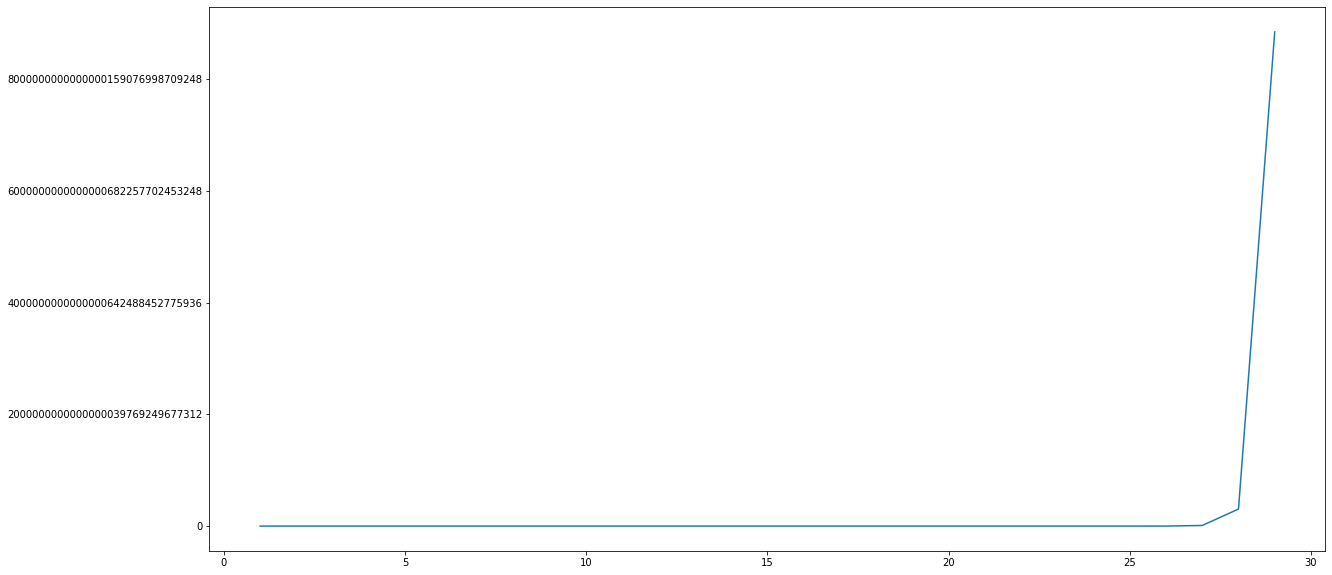

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

antall_kall = [math.factorial(x) for x in range(1, 30)]

plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain')
plt.plot(range(1, 30), antall_kall)


In [10]:
math.factorial(30)

265252859812191058636308480000000

## Objektorientering

Som nevnt er python såkalt objektorientert, og vi har allerede forholdt oss til mange typer objekt - dictionaries, lister, `plt` i koden over og mye mer. Objekt er typisk kjennetegnet ved at vi kaller såkalte *metoder* på de, som i `math.factorial` over er `math` et objekt og `factorial` en metode. Metoder kan som regel betraktes som funksjoner, skillet mellom å kalle noe for en funksjon og noe annet for en metode er primært bare visuelt.

Vi kan selv lage slike objekter ved å definere egne *klasser* som vi kan initialisere til objekt.

Her er det to nye konsepter som det er viktig at vi holder fra hverandre:

1. En *klasse* er en type objekt, for eksempel en dictionary.
2. Et objekt er en *instans*, altså et helt konkret objekt (variabel), f.eks. `{"A": 1, "B": 2}`

En klasse defineres på lignende måte til hvordan funksjoner defineres:

In [11]:
class MyClass():
    a = "Hello"
    
    def sayHello(self):
        print(self.a)
    

In [12]:
hello_object = MyClass()

In [13]:
hello_object.sayHello()

Hello


Her skjer det en del nytt. Vi kjenner igjen variabeltilordningen og funksjonsdefinisjonen, men `self` kommer ut fra intet. `self` er egentlig en referanse til det instansierte objektet, altså `hello_object`, og må være første argumentet til alle metoder. Kanskje er det mer forklarende at `hello_object.say_hello()` egentlig blir evaluert som `MyClass.sayHello(hello_object)`. Variabelen `a` hører til objektet, og må derfor refereres til som `self.a` - ellers ville python lett etter en global variabel `a`, og gitt feilmelding hvis den ikke eksisterte.

Klasser kan også arve fra andre klasser, ved å oppgi dette når du lager de. For enkelhets skyld kan vi bygge på klassen vi allerede har laget, og lage en ny klasse med en ekstra metode.

In [14]:

class extraClass(MyClass):
    b = "goodbye"
    def sayGoodbye(self):
        print(self.b)

In [15]:
g = extraClass()

In [16]:
g.sayHello()

Hello


In [17]:
g.sayGoodbye()

goodbye


## Prøv selv

Å lage klasser er ikke noe vi gjør så mye i dataanalyse, men det kan lønne seg å ha prøvd litt. Det enkleste dekkende eksempelet er å lage en bankkonto-klasse, som initialiseres med en saldo lik 0, og som har tre metoder: `deposit`, `withdraw` og `balance`. Uttakk og innskudd endrer saldoen, og balance-metoden returnerer saldoen.